In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Advertising.csv')

In [54]:
# df['total_spend'] = df['TV']+df['newspaper']+df['radio']

In [55]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [56]:
X = df.drop('sales',axis = 1)

In [57]:
y = df['sales']

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly_con = PolynomialFeatures(degree= 2, include_bias=False)

In [60]:
poly_con.fit(X)

PolynomialFeatures(include_bias=False)

## poly_con.fit(X)

In [61]:
poly_feat = poly_con.transform(X)

In [62]:
poly_feat.shape

(200, 9)

In [63]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [64]:
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [65]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [66]:
poly_con.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
 X_train, X_test, y_train, y_test = train_test_split(poly_feat,y,test_size=0.33)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()

In [71]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
test_pred = model.predict(X_test)

In [73]:
model.coef_

array([ 5.00059019e-02,  2.76328842e-02,  2.24977440e-03, -1.05553856e-04,
        1.08274416e-03, -2.10656097e-05,  2.07175721e-04, -4.92380041e-05,
        3.92286335e-05])

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [75]:
MAE = mean_absolute_error(y_test,test_pred)

In [76]:
MSE = mean_squared_error(y_test,test_pred)

In [77]:
RMSE= np.sqrt(MSE)

In [78]:
MAE

0.4418114273520315

In [79]:
MSE

0.5986867973763177

In [80]:
RMSE

0.7737485362676415

In [81]:
model.coef_

array([ 5.00059019e-02,  2.76328842e-02,  2.24977440e-03, -1.05553856e-04,
        1.08274416e-03, -2.10656097e-05,  2.07175721e-04, -4.92380041e-05,
        3.92286335e-05])

In [82]:
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [83]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [84]:
train_rmse_errors = []
test_rmse_errors = []
for d in range (1,10):
    poly_con = PolynomialFeatures(degree =d , include_bias=False)
    poly_feat = poly_con.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_feat,y,test_size=0.33,random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    
    
    

In [85]:
train_rmse_errors

[1.7376515982447711,
 0.5947926597019143,
 0.44059734232363656,
 0.35329132820381115,
 0.2484537220557955,
 0.18841499262677383,
 4.812814685342328,
 0.1547617183299027,
 0.15166107146422672]

In [86]:
test_rmse_errors

[1.5324409426512418,
 0.6482912032533663,
 0.5577254823360819,
 0.5064297299001411,
 2.3573628737622596,
 11.240104796748835,
 1193.9503865745858,
 3221.534995670424,
 181934.18258268083]

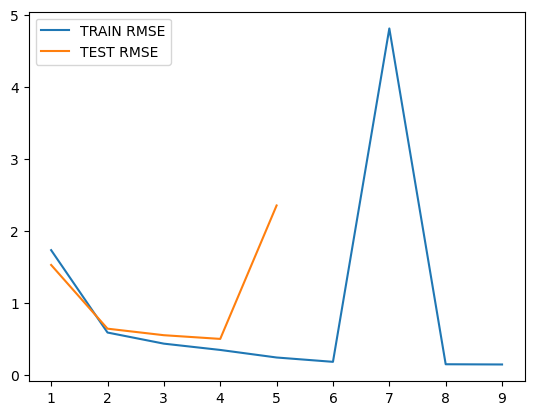

In [87]:
plt.plot(range(1,10),train_rmse_errors,label = 'TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label = 'TEST RMSE')
plt.legend()

In [88]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias= False)

In [89]:
final_model = LinearRegression()

In [90]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [91]:
from joblib import dump,load


In [92]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [93]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [94]:
loaded_converter = load('final_converter.joblib')

In [95]:
loaded_model = load('final_poly_model.joblib')

In [102]:
campaign = [[149,22,12]]

In [103]:
transfromed_data  = loaded_converter.fit_transform(campaign)

In [104]:
loaded_model.predict(transfromed_data)

array([14.64501014])